##  Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# supress warnings
import warnings 
warnings.filterwarnings('ignore')

#### 1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA i sklearn.manifold. TSNE для візуалізації даних, з якими ви працювали в лабораторній No 1 (знижуючи розмірність до двох). 
Візуалізуйте результат.

**Bank client data:**  
**1) age:** (numeric)  
**2) job:** type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")  
**3) marital:** marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)  
**4) education:** (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")  
**5) default:** has credit in default? (categorical: "no", "yes", "unknown")  
**6) housing:** has housing loan? (categorical: "no", "yes", "unknown")  
**7) loan:** has personal loan? (categorical: "no", "yes", "unknown")  

**Related with the last contact of the current campaign:**  
**8) contact:** contact communication type (categorical: "cellular", "telephone")  
**9) month:** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
**10) day_of_week:** last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")  
**11) duration:** last contact duration in seconds (numeric).  
Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**  
**12) campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**13) pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
**14) previous:** number of contacts performed before this campaign and for this client (numeric)  
**15) poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")  

**Social and economic context attributes:**  
**16) emp.var.rate:** employment variation rate - quarterly indicator (numeric)  
**17) cons.price.idx:** consumer price index - monthly indicator (numeric)  
**18) cons.conf.idx:** consumer confidence index - monthly indicator (numeric)  
**19) euribor3m:** euribor 3-month rate - daily indicator (numeric)  
**20) nr.employed:** number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
**21) y:** has the client subscribed to a term deposit? (binary: "yes", "no")


In [53]:
bank_data = pd.read_csv(r"C:\Users\koly\Pr_2\bank-additional-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [55]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [58]:

# Select features to use, excluding 'duration' and 'y'
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Separate features and target
X = bank_data[features]
y = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [59]:

# Define the column transformer with OneHotEncoder for categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [60]:

# Create a pipeline to preprocess the data and apply PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', PCA(n_components=2))])

# Fit and transform the data
X_pca = pipeline.fit_transform(X)


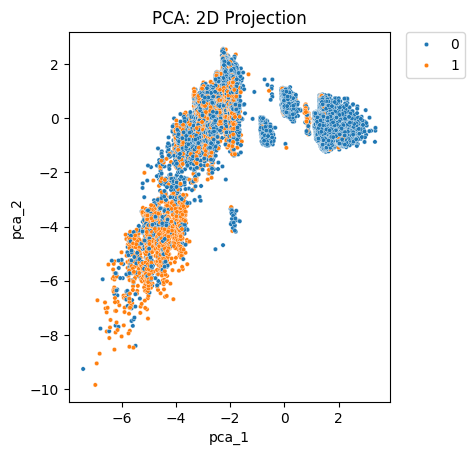

In [61]:

# Plot PCA results
pca_result_df = pd.DataFrame({'pca_1': X_pca[:, 0], 'pca_2': X_pca[:, 1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax, s=10)
ax.set_title('PCA: 2D Projection')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


In [62]:

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(pipeline.named_steps['preprocessor'].transform(X))
# Plot t-SNE results
tsne_result_df = pd.DataFrame({'tsne_1': X_tsne[:, 0], 'tsne_2': X_tsne[:, 1], 'label': y})

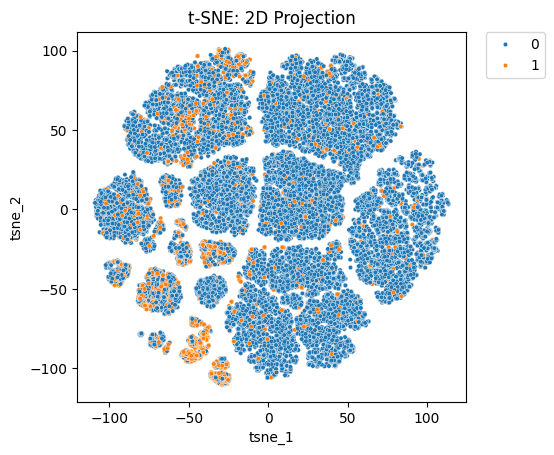

In [63]:

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=10)
ax.set_title('t-SNE: 2D Projection')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


#### 2. Кластерний аналіз
За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.


In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
from PIL import Image

In [65]:
# Function to load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image, dtype=np.float64) / 255
    return image

In [66]:
# Function to perform k-means quantization
def quantize_image(image, n_colors):
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    print(f"Fitting model on a small sub-sample of the data with {n_colors} colors")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

    return kmeans.cluster_centers_, labels, w, h

Fitting model on a small sub-sample of the data with 64 colors
done in 0.054s.
Predicting color indices on the full image (k-means)
done in 0.035s.
Fitting model on a small sub-sample of the data with 32 colors
done in 0.089s.
Predicting color indices on the full image (k-means)
done in 0.041s.
Fitting model on a small sub-sample of the data with 16 colors
done in 0.071s.
Predicting color indices on the full image (k-means)
done in 0.029s.
Fitting model on a small sub-sample of the data with 8 colors
done in 0.075s.
Predicting color indices on the full image (k-means)
done in 0.026s.


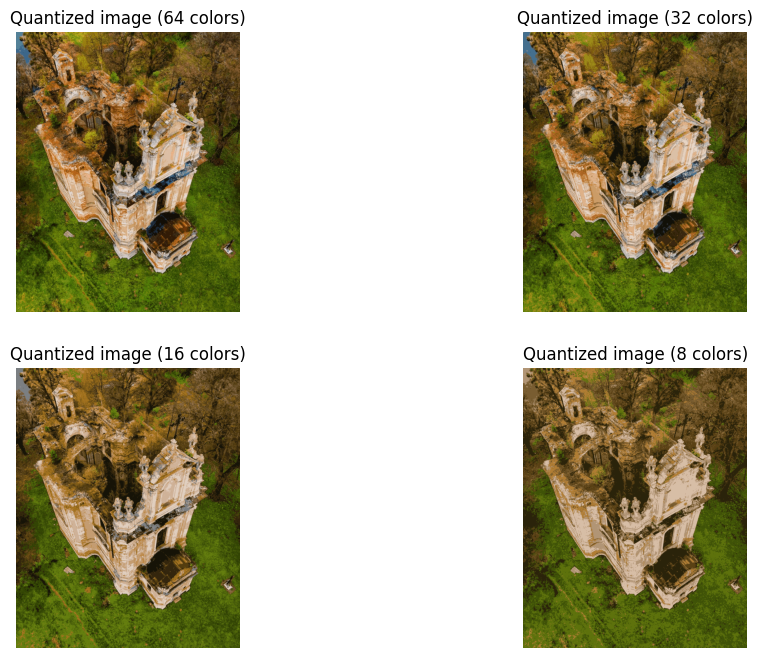

In [67]:
# Function to recreate the image from the codebook and labels
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

# Load the image
image_path = r\AI_python\costel.jpg"
image = load_image(image_path)

# Quantize the image with different levels
n_colors_list = [64, 32, 16, 8]
plt.figure(figsize=(12, 8))

for i, n_colors in enumerate(n_colors_list, 1):
    codebook, labels, w, h = quantize_image(image, n_colors)
    quantized_image = recreate_image(codebook, labels, w, h)
    
    plt.subplot(2, 2, i)
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors)")
    plt.imshow(quantized_image)

plt.show()

#### 3. Обробка текстових даних 
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text. TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості.

In [68]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [69]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
go_emotions = pd.read_parquet(r"C:\koly\Pr_2\train-00000-of-00001.parquet")
go_emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float32
 7   rater_id              211225 non-null  int32  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int32  
 10  amusement             211225 non-null  int32  
 11  anger                 211225 non-null  int32  
 12  annoyance             211225 non-null  int32  
 13  approval              211225 non-null  int32  
 14  caring                211225 non-null  int32  
 15  

In [71]:
# Preprocess text: remove stopwords, punctuation, and lowercase
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

go_emotions['clean_text'] = go_emotions['text'].apply(preprocess_text)

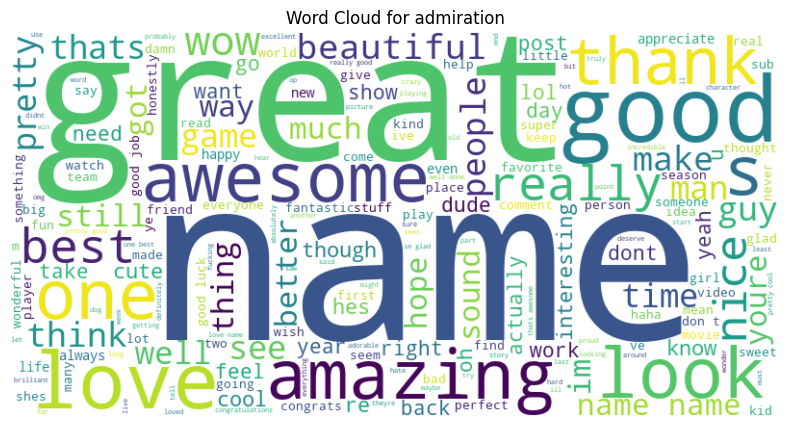

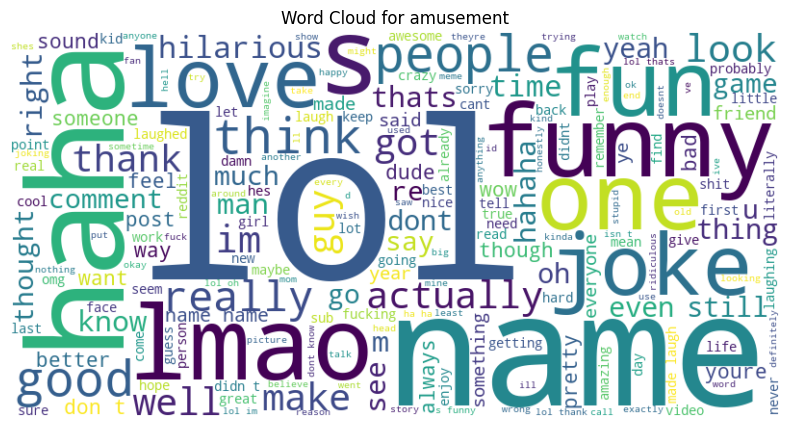

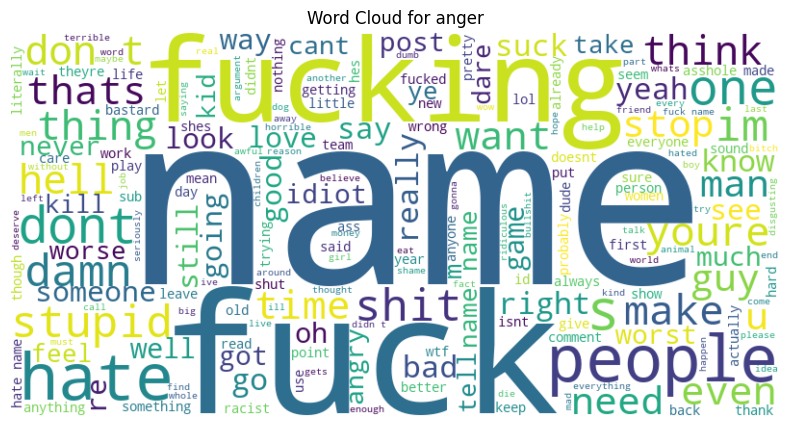

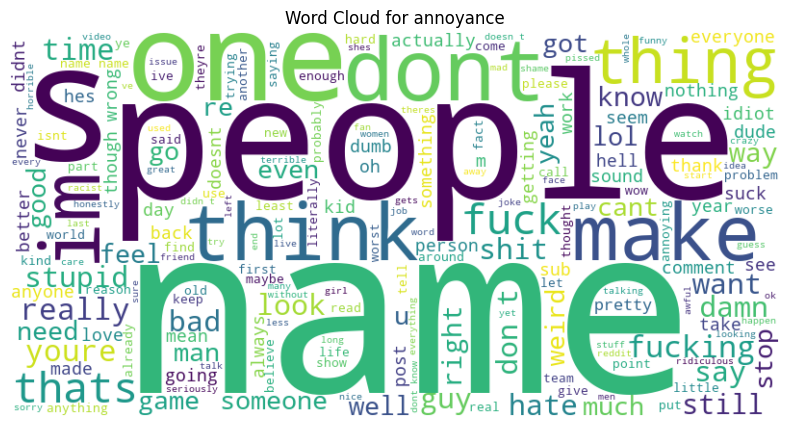

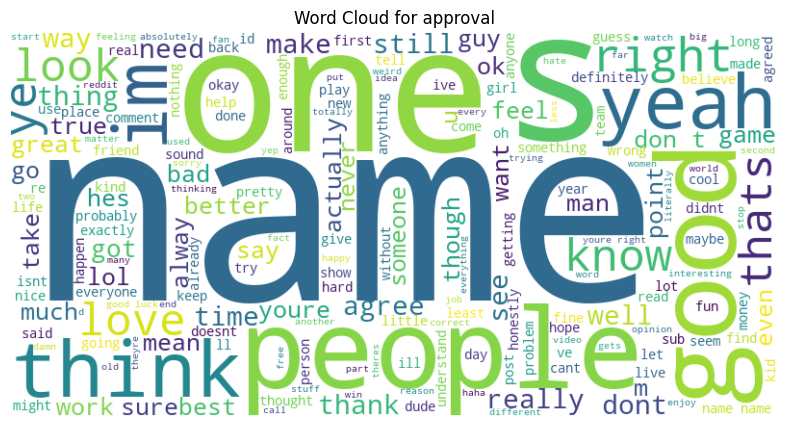

In [72]:

# Create word clouds for each emotion
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# Create word clouds for each emotion
for emotion in emotions[:5]:
    text = " ".join(go_emotions[go_emotions[emotion] == 1]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()


In [73]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(go_emotions['clean_text'])

# Dictionary to store F1-scores for each emotion
f1_scores = {}

# Loop through each emotion and perform classification
for emotion in emotions:
    print(f"Classifying emotion: {emotion}")
    
    # Define the target variable
    y = go_emotions[emotion]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[emotion] = f1
    print(f"F1-score for emotion '{emotion}': {f1:.4f}")
    
    # Print classification report
    print(f"Classification report for emotion '{emotion}':")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {emotion}:")
    print(cm)
    
    print("\n" + "="*80 + "\n")

# Sort emotions by F1-score
sorted_f1_scores = sorted(f1_scores.items(), key=lambda item: item[1], reverse=True)

# Print summary
print("Summary of Emotion Classification:")
print("Best Classified Emotions:")
for emotion, score in sorted_f1_scores[:5]:
    print(f"{emotion}: {score:.4f}")

print("\nWorst Classified Emotions:")
for emotion, score in sorted_f1_scores[-5:]:
    print(f"{emotion}: {score:.4f}")

# Analysis of why some emotions are classified better or worse
print("\nAnalysis:")
print("Emotions with higher F1-scores likely have more distinct and consistent patterns in the text data.")
print("Emotions with lower F1-scores may have overlapping features with other emotions or fewer examples in the dataset.")


Classifying emotion: admiration
F1-score for emotion 'admiration': 0.9147
Classification report for emotion 'admiration':
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     38789
           1       0.66      0.27      0.38      3456

    accuracy                           0.93     42245
   macro avg       0.80      0.63      0.67     42245
weighted avg       0.92      0.93      0.91     42245

Confusion Matrix for admiration:
[[38324   465]
 [ 2535   921]]


Classifying emotion: amusement
F1-score for emotion 'amusement': 0.9531
Classification report for emotion 'amusement':
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40354
           1       0.59      0.30      0.40      1891

    accuracy                           0.96     42245
   macro avg       0.78      0.65      0.69     42245
weighted avg       0.95      0.96      0.95     42245

Confusion Matrix for amusement:
[[39968